In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.plotly as py
import cufflinks as cf




In [2]:


df=pd.read_csv('/Users/Marina/Documents/GA Data Science/projects/projects-capstone/clean_data.csv')

df.head()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec
0,4,4.0,Female,7,1,1,10,6,3,1,...,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,0
1,4,4.0,Female,7,1,1,10,6,2,2,...,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,0
2,4,4.0,Female,7,1,1,10,6,4,4,...,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,1
3,4,4.0,Female,7,1,1,10,6,6,5,...,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,0
4,4,4.0,Female,7,1,1,10,6,5,6,...,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,0


In [3]:
df_male=df.loc[df['gender'] == "Male"];
df_female=df.loc[df['gender'] == "Female"]

In [4]:
df_male['iid'].nunique()


230

In [5]:
df_female['iid'].nunique()

235

In [6]:
df1=df_male.groupby('iid')['age'].mean().to_frame();
df1.reset_index(inplace=True);
df2=df_female.groupby('iid')['age'].mean().to_frame();
df2.reset_index(inplace=True)




In [7]:
y_male=df1['age']
y_female=df2['age']


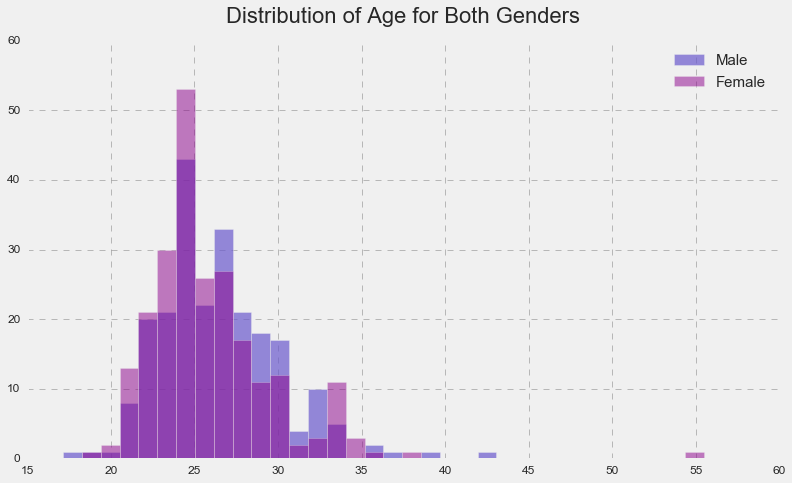

In [27]:
# plt.style.use('bmh')
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
bins = np.linspace(16, 60, 40)
plt.style.use('fivethirtyeight')
plt.title("Distribution of Age for Both Genders",fontsize=22,y=1.03)
plt.hist(y_male,bins, label='Male', alpha=.7, color='slateblue')

#histtype : {'bar', 'barstacked', 'step',  'stepfilled'}
plt.hist(y_female,bins, alpha=.5, label='Female', color='darkmagenta')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=15)
plt.grid(color='gray', linestyle='--', alpha=.5)

plt.show()

#violet

In [15]:
df2 = df.groupby(['race','gender']).iid.nunique().to_frame()
df2.reset_index(inplace=True)

df2

,race,gender,iid
0,African American,Female,13
1,African American,Male,9
2,Asian American,Female,60
3,Asian American,Male,56
4,European American,Female,128
5,European American,Male,139
6,Hispanic American,Female,18
7,Hispanic American,Male,13
8,Other,Female,16
9,Other,Male,13


In [16]:
df2 = df.groupby(['race','gender']).iid.nunique().to_frame('count')
df2.reset_index(inplace=True)

df3=pd.pivot_table(df2, index=['race'], columns=['gender'], values=['count'])
df3.reset_index(col_level=1,inplace=True, level=0)
df3

raw_data = {'race': ['African American', 'Asian American', 'European American', 'Hispanic American', 'Other'],  
        'Female': [13,60,128,18,16],
        'Male': [9,56,139,13,13]}

df5 = pd.DataFrame(raw_data)
df5

,Female,Male,race
0,13,9,African American
1,60,56,Asian American
2,128,139,European American
3,18,13,Hispanic American
4,16,13,Other


In [17]:
df2 = df.groupby(['iid','race', 'gender']).iid.nunique().to_frame('count')
df2.reset_index(inplace=True)

df2.head()



,iid,race,gender,count
0,4,European American,Female,1
1,5,European American,Female,1
2,6,Asian American,Female,1
3,7,Asian American,Female,1
4,8,European American,Female,1


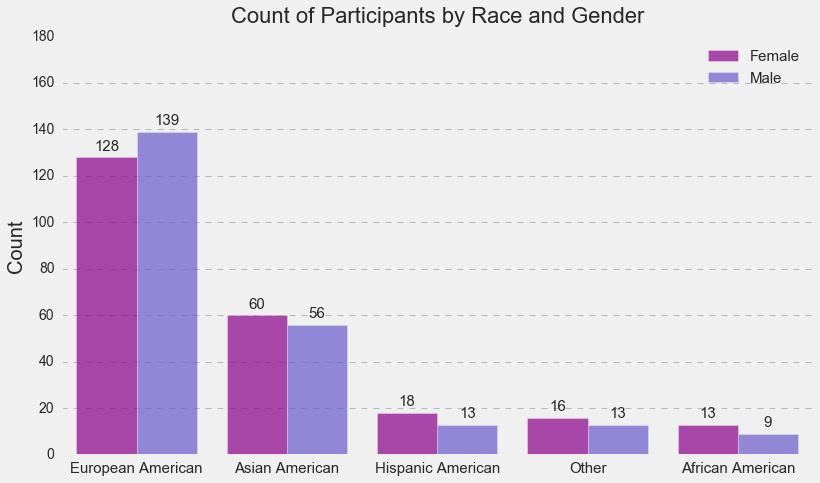

In [24]:
# plt.style.use('bmh')
plt.style.use('fivethirtyeight')
#plt.figure(figsize=(13,7), facecolor='lightgray')
plt.figure(figsize=(12,7))
#plt.rcParams['axes.facecolor'] = 'lightgray'
plt.grid(color='gray', linestyle='--', alpha=.5)
plt.title("Count of Participants by Race and Gender",fontsize=22, y=1.02)

# start, end = ax.get_xlim()
# ax.yaxis.set_ticks(np.arange(start=0, end=150, 1))
plt.ylim([0,180])
plt.xticks(fontsize=12)
plt.xlabel("Race")
color = dict(Female="darkmagenta", Male="slateblue")
ax=sns.countplot(x="race",hue='gender',data=df2, saturation=10, palette=color,alpha=0.7, order=['European American','Asian American',\
                       'Hispanic American', 'Other', 'African American'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center",fontsize=15)
plt.xlabel('')
plt.xticks(fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=20)
plt.legend(['Female', 'Male'], loc='upper right', fontsize=15)   
plt.show()


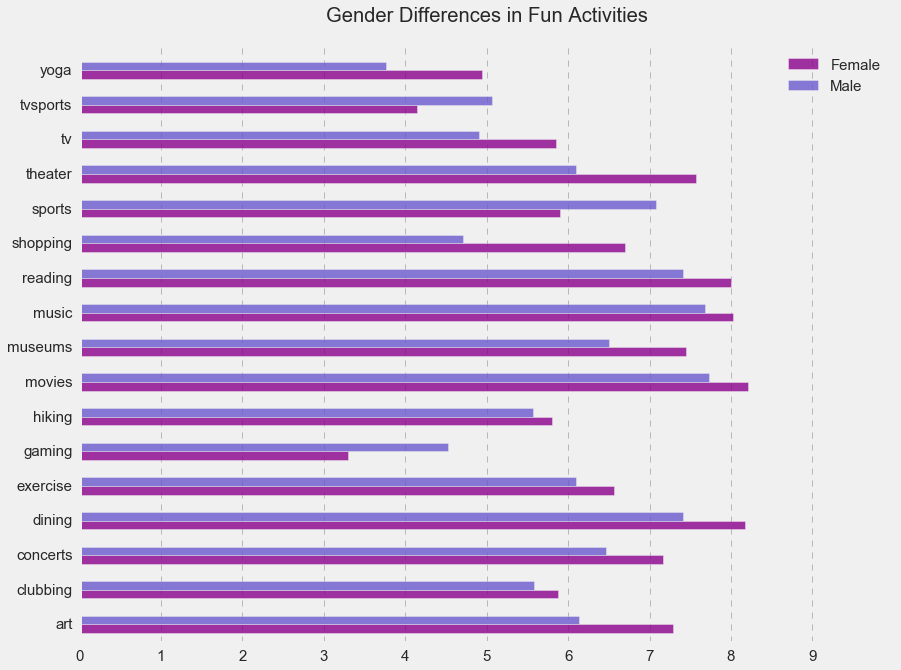

In [26]:
df7=pd.pivot_table(df, index=['gender'], values=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading',
                       'tv','theater','movies','concerts','music','shopping','yoga']).T
df7.reset_index(inplace=True)
df7

plt.style.use('fivethirtyeight')


pos = list(range(len(df7['Female'])))
width = 0.25


#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(13,10))

plt.barh(pos,
        df7['Female'],
        width,
        color='darkmagenta',
        label=df7['index'][0],alpha=.8)

plt.barh([p + width for p in pos],
        df7['Male'],
        width,
        color='slateblue',
        label=df7['index'][1],alpha=.8)

#ax.set_xlabel('Score')
 
#ax.patch.set_facecolor('lightgray')
plt.grid(color='gray', linestyle='--', alpha=.5)
         #, axis='x', which='major')

ax.set_title('Gender Differences in Fun Activities',y=1.03)

ax.set_yticks([p + width for p in pos])

ax.set_yticklabels(df7['index'], size =15)
ax.yaxis.grid(False)
plt.xticks(range(0, 10, 1), size=15)

plt.ylim(min(pos)-width, max(pos)+width*4)
plt.xlim([0, 10])

# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, 1))

plt.legend(['Female', 'Male'], loc='upper right', fontsize=15)

plt.show()

In [28]:
df4=pd.pivot_table(df, index=['gender'], values=['attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']).T
df4.reset_index(inplace=True)
df4

gender,index,Female,Male
0,amb1_1,13.161587,8.538217
1,attr1_1,17.801627,26.744092
2,fun1_1,17.267783,17.799407
3,intel1_1,21.089130,19.476702
4,shar1_1,12.704135,10.909385
5,sinc1_1,17.989396,16.691065


In [29]:
df4['index']=df4['index'].apply(lambda x: str(x))

In [30]:
def category(words):
        if 'amb1_1' in words:
            return 'Ambitious'
        elif 'attr1_1' in words:
            return 'Attractive'
        elif 'fun1_1' in words:
            return 'Funny'
        elif 'intel1_1' in words:
            return 'Intelligent'
        elif 'fun1_1' in words:
            return 'Fun'
        elif 'shar1_1' in words:
            return 'Shared Interests'
        elif 'sinc1_1' in words:
            return 'Sincere'

In [31]:

df4['index']=df4['index'].map(category)

df4

gender,index,Female,Male
0,Ambitious,13.161587,8.538217
1,Attractive,17.801627,26.744092
2,Funny,17.267783,17.799407
3,Intelligent,21.089130,19.476702
4,Shared Interests,12.704135,10.909385
5,Sincere,17.989396,16.691065


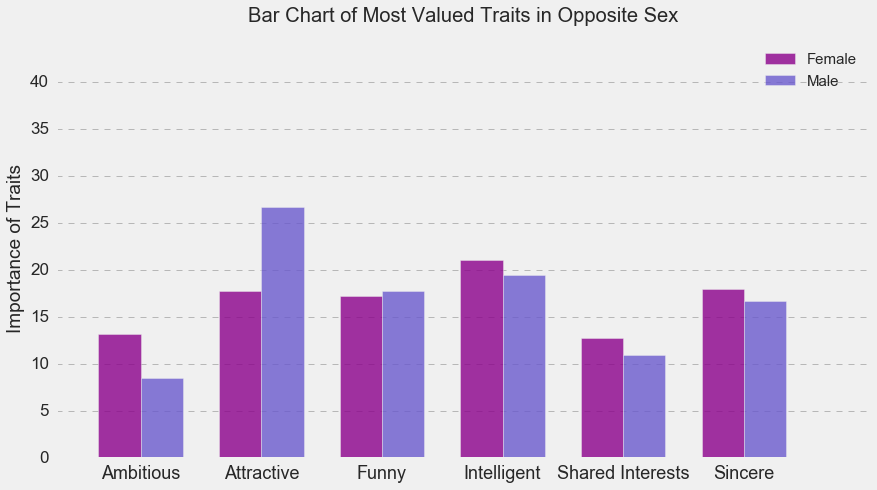

In [44]:
# Setting the positions and width for the bars
plt.style.use('fivethirtyeight')
# plt.style.use('bmh')


pos = list(range(len(df4['Female'])))
width = 0.35


#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(13,7))

plt.bar(pos,
        df4['Female'],
        width,
        color='darkmagenta',
        label=df4['index'][0], alpha=.8)

plt.bar([p + width for p in pos],
        df4['Male'],
        width,
        color='slateblue',
        label=df4['index'][1], alpha=.8)

ax.set_ylabel('Importance of Traits', fontsize=19)
 
#ax.patch.set_facecolor('lightgray')
plt.grid(color='gray', linestyle='--', alpha=.5)

ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + width for p in pos])

ax.set_xticklabels(df4['index'], size =15)
ax.xaxis.grid(False)
plt.yticks(size=17)
plt.xticks(size=18)
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df4['Female'] + df4['Male'])] )

plt.legend(['Female', 'Male'], loc='upper right', fontsize=15)

plt.show()